<a href="https://colab.research.google.com/github/Eun0/Algorithm_Study/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 로드

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
cp /content/drive/MyDrive/data.tar.gz /content/

In [3]:
cd /content

/content


In [4]:
!tar -zxvf data.tar.gz 

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
dataset/test/._2601.jpg
dataset/test/2601.jpg
dataset/test/._4270.jpg
dataset/test/4270.jpg
dataset/test/._3279.jpg
dataset/test/3279.jpg
dataset/test/._4516.jpg
dataset/test/4516.jpg
dataset/test/._2167.jpg
dataset/test/2167.jpg
dataset/test/._0770.jpg
dataset/test/0770.jpg
dataset/test/._3251.jpg
dataset/test/3251.jpg
dataset/test/._1446.jpg
dataset/test/1446.jpg
dataset/test/._0980.jpg
dataset/test/0980.jpg
dataset/test/._0758.jpg
dataset/test/0758.jpg
dataset/test/._1320.jpg
dataset/test/1320.jpg
dataset/test/._2629.jpg
dataset/test/2629.jpg
dataset/test/._4258.jpg
dataset/test/4258.jpg
dataset/test/._3537.jpg
dataset/test/3537.jpg
dataset/test/._3523.jpg
dataset/test/3523.jpg
dataset/test/._1334.jpg
dataset/test/1334.jpg
dataset/test/._1452.jpg
dataset/test/1452.jpg
dataset/test/._0994.jpg
dataset/test/0994.jpg
dataset/test/._3245.jpg
dataset/test/3245.jpg
dataset/test/._2142.jpg
dataset/test/2142.jpg
dataset/test/._4533.jpg
dataset/test/4533.jp

In [5]:
import os 
import json
from pycocotools.coco import COCO

root = 'dataset/'
train_prefix = root + 'train/'
test_prefix = root + 'test/'

train_jpath = root + 'train.json'
test_jpath = root + 'test.json'

with open(train_jpath, 'r') as f:
    train_json = json.load(f)

with open(test_jpath, 'r') as f:
    test_json= json.load(f) 

train_set = COCO(train_jpath)
test_set = COCO(test_jpath)

print('data 구성 정보 :', train_json.keys())

loading annotations into memory...
Done (t=0.13s)
creating index...
index created!
loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
data 구성 정보 : dict_keys(['info', 'licenses', 'images', 'categories', 'annotations'])


# 데이터 분석

In [6]:
# 필요한 모듈 import
import glob
import numpy as np
import pandas as pd 
from pandas import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import cv2

%matplotlib inline
sns.set(color_codes=True)

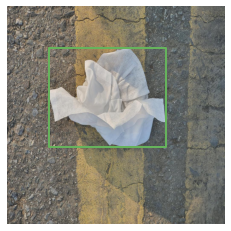

In [116]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon

def show_anns(img_path, anns, pallette='r'):
    img = Image.open(img_path) 
    plt.imshow(np.asarray(img))
    ax = plt.gca()
    ax.axis('off')
    ax.set_autoscale_on(False)
    colors = []
    polygons = []
    for ann in anns:
        x,y,w,h = ann['bbox']
        poly = [[x, y], [x, y+h], [x+w, y+h], [x+w, y]]
        np_poly = np.array(poly).reshape((4,2))
        colors.append(pallette[ann['category_id']])
        polygons.append(Polygon(np_poly))
    p = PatchCollection(polygons, facecolor='none', edgecolors=colors, linewidths=2)
    ax.add_collection(p)

np.random.seed(42)
bbox_palette = np.random.randint(0,256, size=(10, 3))
bbox_palette = [tuple(c/255) for c in bbox_palette]
img_id = 0
img_path = root + train_set.loadImgs([img_id])[0]['file_name']
ann_ids = train_set.getAnnIds(imgIds=[img_id])
anns = train_set.loadAnns(ann_ids)
show_anns(img_path, anns, bbox_palette)


## 학습 이미지 분석

In [8]:
train_annotations = json_normalize(train_json['annotations'])
train_images = json_normalize(train_json['images'])
train_images.head()

,width,height,file_name,license,flickr_url,coco_url,date_captured,id
0,1024,1024,train/0000.jpg,0,None,None,2020-12-26 14:44:23,0
1,1024,1024,train/0001.jpg,0,None,None,2021-01-10 16:30:39,1
2,1024,1024,train/0002.jpg,0,None,None,2020-12-27 17:55:52,2
3,1024,1024,train/0003.jpg,0,None,None,2021-03-31 12:10:36,3
4,1024,1024,train/0004.jpg,0,None,None,2021-01-01 18:52:38,4


분석에 불필요한 정보 제외

In [9]:
train_images = train_images[['width','height','date_captured','id']]
train_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4883 entries, 0 to 4882
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   width          4883 non-null   int64 
 1   height         4883 non-null   int64 
 2   date_captured  4879 non-null   object
 3   id             4883 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 152.7+ KB


### 학습 이미지 크기
모든 학습 데이터의 이미지 크기는 (1024,1024) 로 동일하다

In [10]:
print(f"이미지 width의 최대: {max(train_images['width'])}, 최소: {min(train_images['width'])}, 평균: {train_images['width'].mean()}")
print(f"이미지 height의 최대: {max(train_images['height'])}, 최소: {min(train_images['height'])}, 평균: {train_images['height'].mean()}")

이미지 width의 최대: 1024, 최소: 1024, 평균: 1024.0
이미지 height의 최대: 1024, 최소: 1024, 평균: 1024.0


### 학습 이미지 촬영된 시간

In [11]:
train_images['date_captured'] = pd.to_datetime(
    train_images['date_captured'], 
    format='%Y-%m-%d %H:%M:%S', 
    errors='raise'
)
train_images['date_captured'].dt.hour.describe(datetime_is_numeric=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


count    4879.000000
mean       14.610576
std         3.527148
min         0.000000
25%        12.000000
50%        15.000000
75%        17.000000
max        23.000000
Name: date_captured, dtype: float64

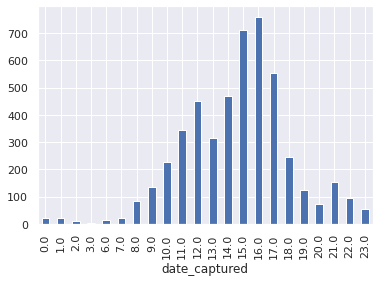

In [12]:
train_images['date_captured'].groupby(train_images['date_captured'].dt.hour).count().plot(kind='bar')
None

10


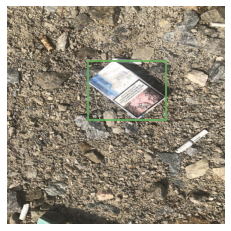

In [13]:
id = train_images[train_images['date_captured'].dt.hour == train_images['date_captured'].dt.hour.median()].iloc[0]['id']
print(id)

max_path = root + train_set.loadImgs([id])[0]['file_name']
ann_ids = train_set.getAnnIds(imgIds=[id])
anns = train_set.loadAnns(ann_ids)
show_anns(max_path, anns, bbox_palette)


### 이미지 별 object 개수

In [120]:
train_annotations['image_id'].value_counts().describe()

count    4883.000000
mean        4.739709
std         6.355155
min         1.000000
25%         1.000000
50%         2.000000
75%         6.000000
max        71.000000
Name: image_id, dtype: float64

## 학습 클래스 분석

In [14]:
train_annotations.head()

,image_id,category_id,area,bbox,iscrowd,id
0,0,0,257301.66,"[197.6, 193.7, 547.8, 469.7]",0,0
1,1,3,10402.56,"[0.0, 407.4, 57.6, 180.6]",0,1
2,1,7,26259.36,"[0.0, 455.6, 144.6, 181.6]",0,2
3,1,4,69096.17,"[722.3, 313.4, 274.3, 251.9]",0,3
4,1,5,24164.58,"[353.2, 671.0, 233.7, 103.4]",0,4


In [15]:
train_annotations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23144 entries, 0 to 23143
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   image_id     23144 non-null  int64  
 1   category_id  23144 non-null  int64  
 2   area         23144 non-null  float64
 3   bbox         23144 non-null  object 
 4   iscrowd      23144 non-null  int64  
 5   id           23144 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 1.1+ MB


### 클래스 별 bbox 개수

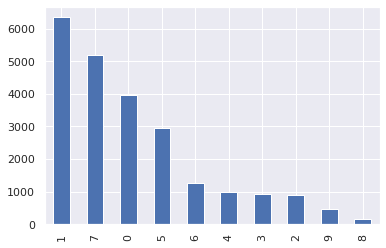

1    6352
7    5178
0    3966
5    2943
6    1263
4     982
3     936
2     897
9     468
8     159
Name: category_id, dtype: int64

In [142]:
bbox_per_class = train_annotations['category_id'].value_counts()
bbox_per_class.plot(kind='bar')
plt.show()
bbox_per_class

### 클래스 별 bbox 크기

In [66]:
class_df = train_annotations.groupby('category_id', observed=True)
class_df['area'].describe()

,count,mean,std,min,25%,50%,75%,max
category_id,,,,,,,,
0,3966.0,78860.147368,139422.920453,0.56,4938.0375,19481.535,87530.2350,1048064.06
1,6352.0,92044.196322,141316.534122,3.12,9473.8450,35645.330,114932.7675,1048064.06
2,897.0,76116.495072,97160.645284,66.25,9238.1800,35691.840,107663.1200,900676.93
3,936.0,91644.378526,120828.132732,275.12,8136.8250,46016.250,123657.4400,745866.82
4,982.0,69338.117495,90700.947589,666.05,13367.2425,34655.040,91455.9000,699923.90
5,2943.0,80990.612409,124858.599769,105.08,7651.0950,28801.000,99308.4650,1047961.69
6,1263.0,97589.452375,122225.182798,682.95,18536.3200,51485.060,128837.1750,992374.78
7,5178.0,110357.698233,139559.633291,301.71,17805.7650,62505.200,146878.8900,1048371.21
8,159.0,50409.963711,48461.271709,1639.08,22835.1100,38101.420,60976.1300,285908.24


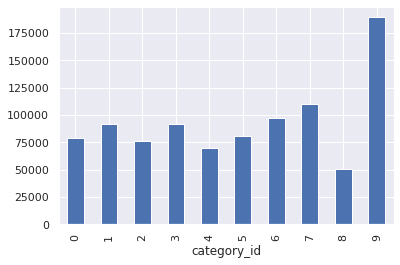

In [67]:
# 클래스별 bbox 평균 크기 시각화
class_df['area'].mean().plot(kind='bar')
plt.show()

[image_id                             3490
category_id                             4
area                             699923.9
bbox           [61.2, 94.8, 817.0, 856.7]
iscrowd                                 0
id                                  16606
Name: 16606, dtype: object]


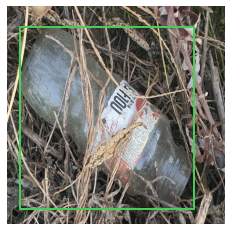

In [118]:
class_ind = 4
anns = [train_annotations[(train_annotations['category_id']==class_ind)&(train_annotations['area'] == class_df['area'].get_group(class_ind).max())].iloc[0]]
id = int(anns[0]['image_id'])

max_path = root + train_set.loadImgs([id])[0]['file_name']
show_anns(max_path, anns, bbox_palette)
print(anns)

[image_id                             4414
category_id                             4
area                               666.05
bbox           [401.8, 522.9, 38.5, 17.3]
iscrowd                                 0
id                                  20886
Name: 20886, dtype: object]


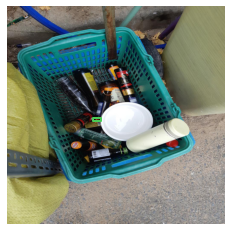

In [117]:
class_ind = 4
anns = [train_annotations[(train_annotations['category_id']==class_ind)&(train_annotations['area'] == class_df['area'].get_group(class_ind).min())].iloc[0]]
id = int(anns[0]['image_id'])

max_path = root + train_set.loadImgs([id])[0]['file_name']
show_anns(max_path, anns, bbox_palette)
print(anns)

### Outlier 탐지

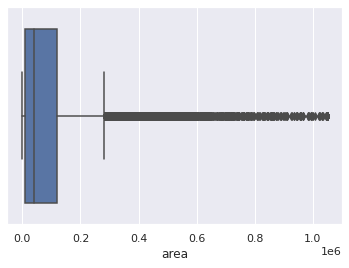

In [121]:
sns.boxplot(x=train_annotations['area'])

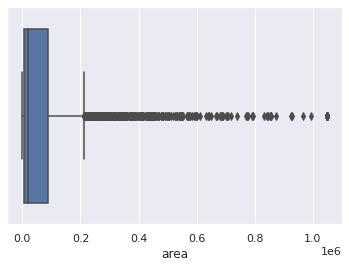

0 removed 218 portion 0.054967221381744834


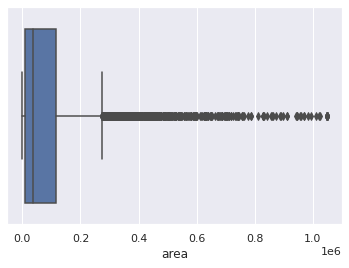

1 removed 237 portion 0.037311083123425695


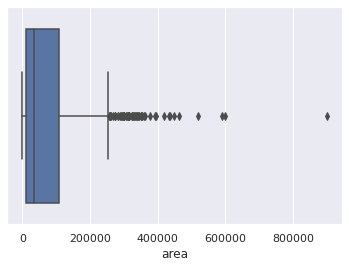

2 removed 9 portion 0.010033444816053512


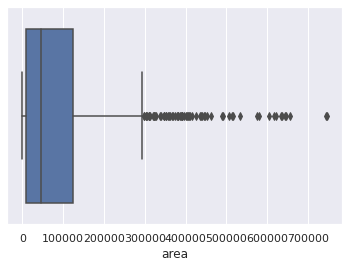

3 removed 18 portion 0.019230769230769232


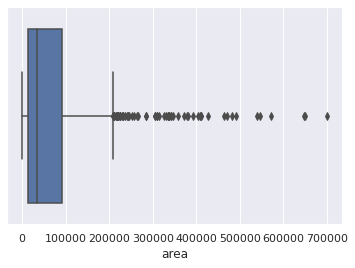

4 removed 29 portion 0.029531568228105907


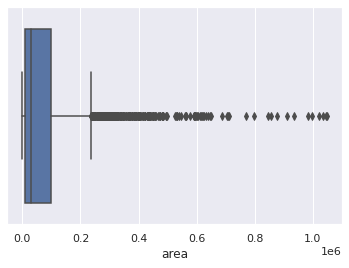

5 removed 108 portion 0.03669724770642202


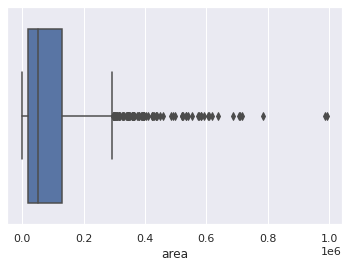

6 removed 26 portion 0.02058590657165479


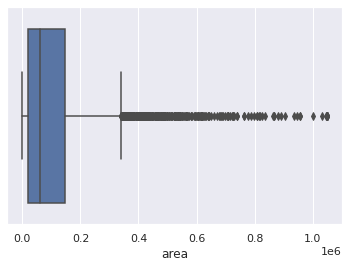

7 removed 106 portion 0.020471224410969487


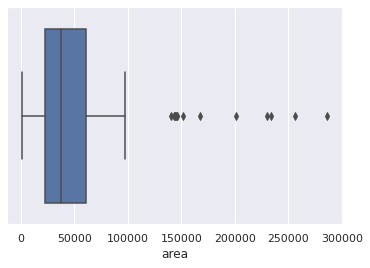

8 removed 5 portion 0.031446540880503145


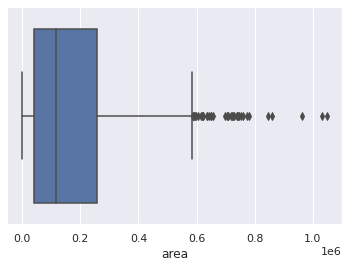

9 removed 3 portion 0.00641025641025641


In [147]:
cleaned_data = pd.DataFrame(columns=train_annotations.columns) 
for i in range(10):
    df = train_annotations['area'][train_annotations['category_id']==i]
    sns.boxplot(x=df)
    plt.show()
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    cleaned = train_annotations[(train_annotations['category_id'] == i) &\
                                (~((train_annotations['area'] < (q1 - 3 * iqr)) |(train_annotations['area'] > (q3 + 3 * iqr))))]
    cleaned_data = cleaned_data.append(cleaned, ignore_index=True)
    print(i, 'removed', bbox_per_class[i] - len(cleaned),'portion', (bbox_per_class[i] - len(cleaned))/bbox_per_class[i])

In [150]:
len(cleaned_data['image_id'].unique())

4627

In [152]:
cleaned_data

,image_id,category_id,area,bbox,iscrowd,id
0,0,0,257301.66,"[197.6, 193.7, 547.8, 469.7]",0,0
1,1,0,38908.72,"[425.3, 681.9, 216.4, 179.8]",0,6
2,1,0,6857.76,"[622.4, 686.5, 72.8, 94.2]",0,8
3,4,0,4523.64,"[868.2, 521.7, 101.2, 44.7]",0,17
4,5,0,12162.85,"[320.0, 233.7, 182.9, 66.5]",0,19
...,...,...,...,...,...,...
22380,4850,9,43968.54,"[511.2, 429.0, 238.7, 184.2]",0,23019
22381,4850,9,67555.79,"[264.6, 643.7, 328.1, 205.9]",0,23020
22382,4856,9,56751.10,"[459.5, 340.3, 323.0, 175.7]",0,23046
22383,4856,9,78756.30,"[294.9, 355.6, 324.1, 243.0]",0,23047


In [157]:
cleaned_dict = cleaned_data.to_dict('records')
#dict_keys(['info', 'licenses', 'images', 'categories', 'annotations'])
cleaned_json = {
    'info': train_json['info'],
    'license': train_json['licenses'],
    'images': train_json['images'],
    'categories': train_json['categories'],
    'annotations': cleaned_dict,
}

with open('cleaned_train.json', 'w', encoding='utf-8') as f:
    json.dump(cleaned_json, f)

In [158]:
cp cleaned_train.json /content/drive/MyDrive